In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from tabulate import tabulate
import sklearn

In [3]:
train = pd.read_csv('data/train.csv', index_col=[0])
test = pd.read_csv('data/test.csv', index_col=[0])

df = pd.concat([train, test])

In [6]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     12988

In [8]:
df.dropna(axis=0, inplace=True)

In [10]:
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].astype('float')

In [11]:
zeroRatingRows = df[(df['Inflight wifi service']==0)|
                     (df['Departure/Arrival time convenient']==0)|
                     (df['Ease of Online booking']==0)|
                     (df['Gate location']==0)|
                     (df['Food and drink']==0)|
                     (df['Online boarding']==0)|
                     (df['Seat comfort']==0)|
                     (df['Inflight entertainment']==0)|
                     (df['On-board service']==0)|
                     (df['Leg room service']==0)|
                     (df['Baggage handling']==0)|
                     (df['Checkin service']==0)|
                     (df['Inflight service']==0)|
                     (df['Cleanliness']==0)].index

df.drop(zeroRatingRows, inplace=True)

In [15]:
df.drop(['id'], axis=1, inplace=True)
df.reset_index(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115328 entries, 0 to 115327
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   index                              115328 non-null  int64  
 1   Gender                             115328 non-null  object 
 2   Customer Type                      115328 non-null  object 
 3   Age                                115328 non-null  int64  
 4   Type of Travel                     115328 non-null  object 
 5   Class                              115328 non-null  object 
 6   Flight Distance                    115328 non-null  int64  
 7   Inflight wifi service              115328 non-null  int64  
 8   Departure/Arrival time convenient  115328 non-null  int64  
 9   Ease of Online booking             115328 non-null  int64  
 10  Gate location                      115328 non-null  int64  
 11  Food and drink                     1153

In [18]:
df.describe()

,index,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000
mean,45234.030236,39.853141,1223.041542,2.818812,3.206437,2.878971,2.987262,3.212542,3.329859,3.456715,3.379899,3.386749,3.381867,3.638509,3.293493,3.647423,3.293606,14.828507,15.269735
std,31182.933192,15.029628,999.348306,1.253365,1.386996,1.298499,1.282303,1.324611,1.263588,1.312121,1.327398,1.285533,1.295034,1.167805,1.265975,1.165018,1.310101,38.078253,38.583433
min,0.000000,7.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,17089.500000,28.000000,441.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,41116.500000,40.000000,867.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,72537.250000,51.000000,1773.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,103903.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Visualizations

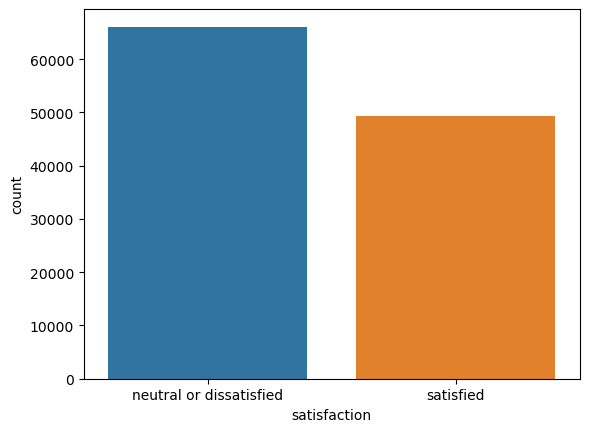

In [23]:
sns.countplot(data=df, x='satisfaction')
plt.show()

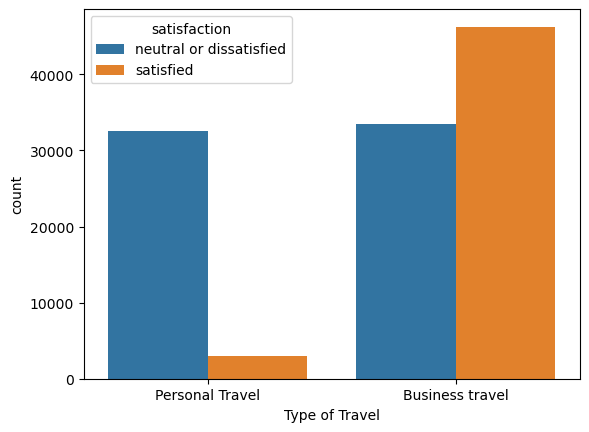

In [24]:
sns.countplot(data=df, x='Type of Travel', hue='satisfaction')
plt.show()

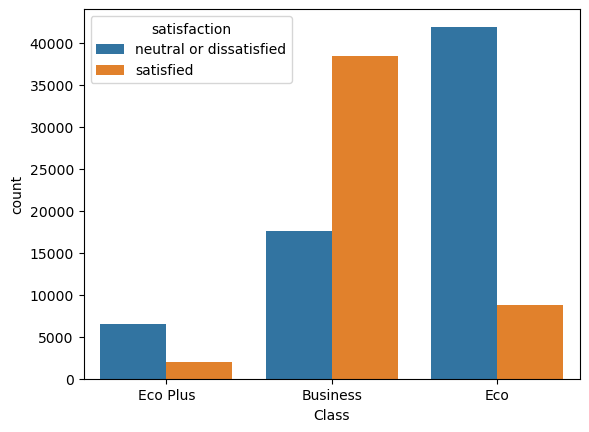

In [25]:
sns.countplot(data=df, x='Class', hue='satisfaction')
plt.show()

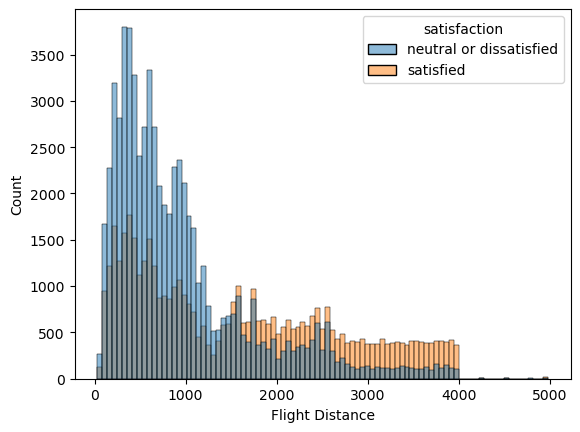

In [28]:
sns.histplot(data=df, x='Flight Distance', hue='satisfaction')
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df1 = df.copy()
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

for c in categorical_cols:
    df1[c] = label_encoder.fit_transform(df1[c])

df1['satisfaction'] = df1['satisfaction'].replace('satisfied', 1)
df1['satisfaction'] = df1['satisfaction'].replace('neutral or dissatisfied', 0)

df1.head()

,index,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25.0,18.0,0
1,1,1,1,25,0,0,235,3,2,3,...,1,1,5,3,1,4,1,1.0,6.0,0
2,4,1,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0.0,0.0,1
3,5,0,0,26,1,1,1180,3,4,2,...,1,3,4,4,4,4,1,0.0,0.0,0
4,6,1,0,47,1,1,1276,2,4,2,...,2,3,3,4,3,5,2,9.0,23.0,0


<Axes: >

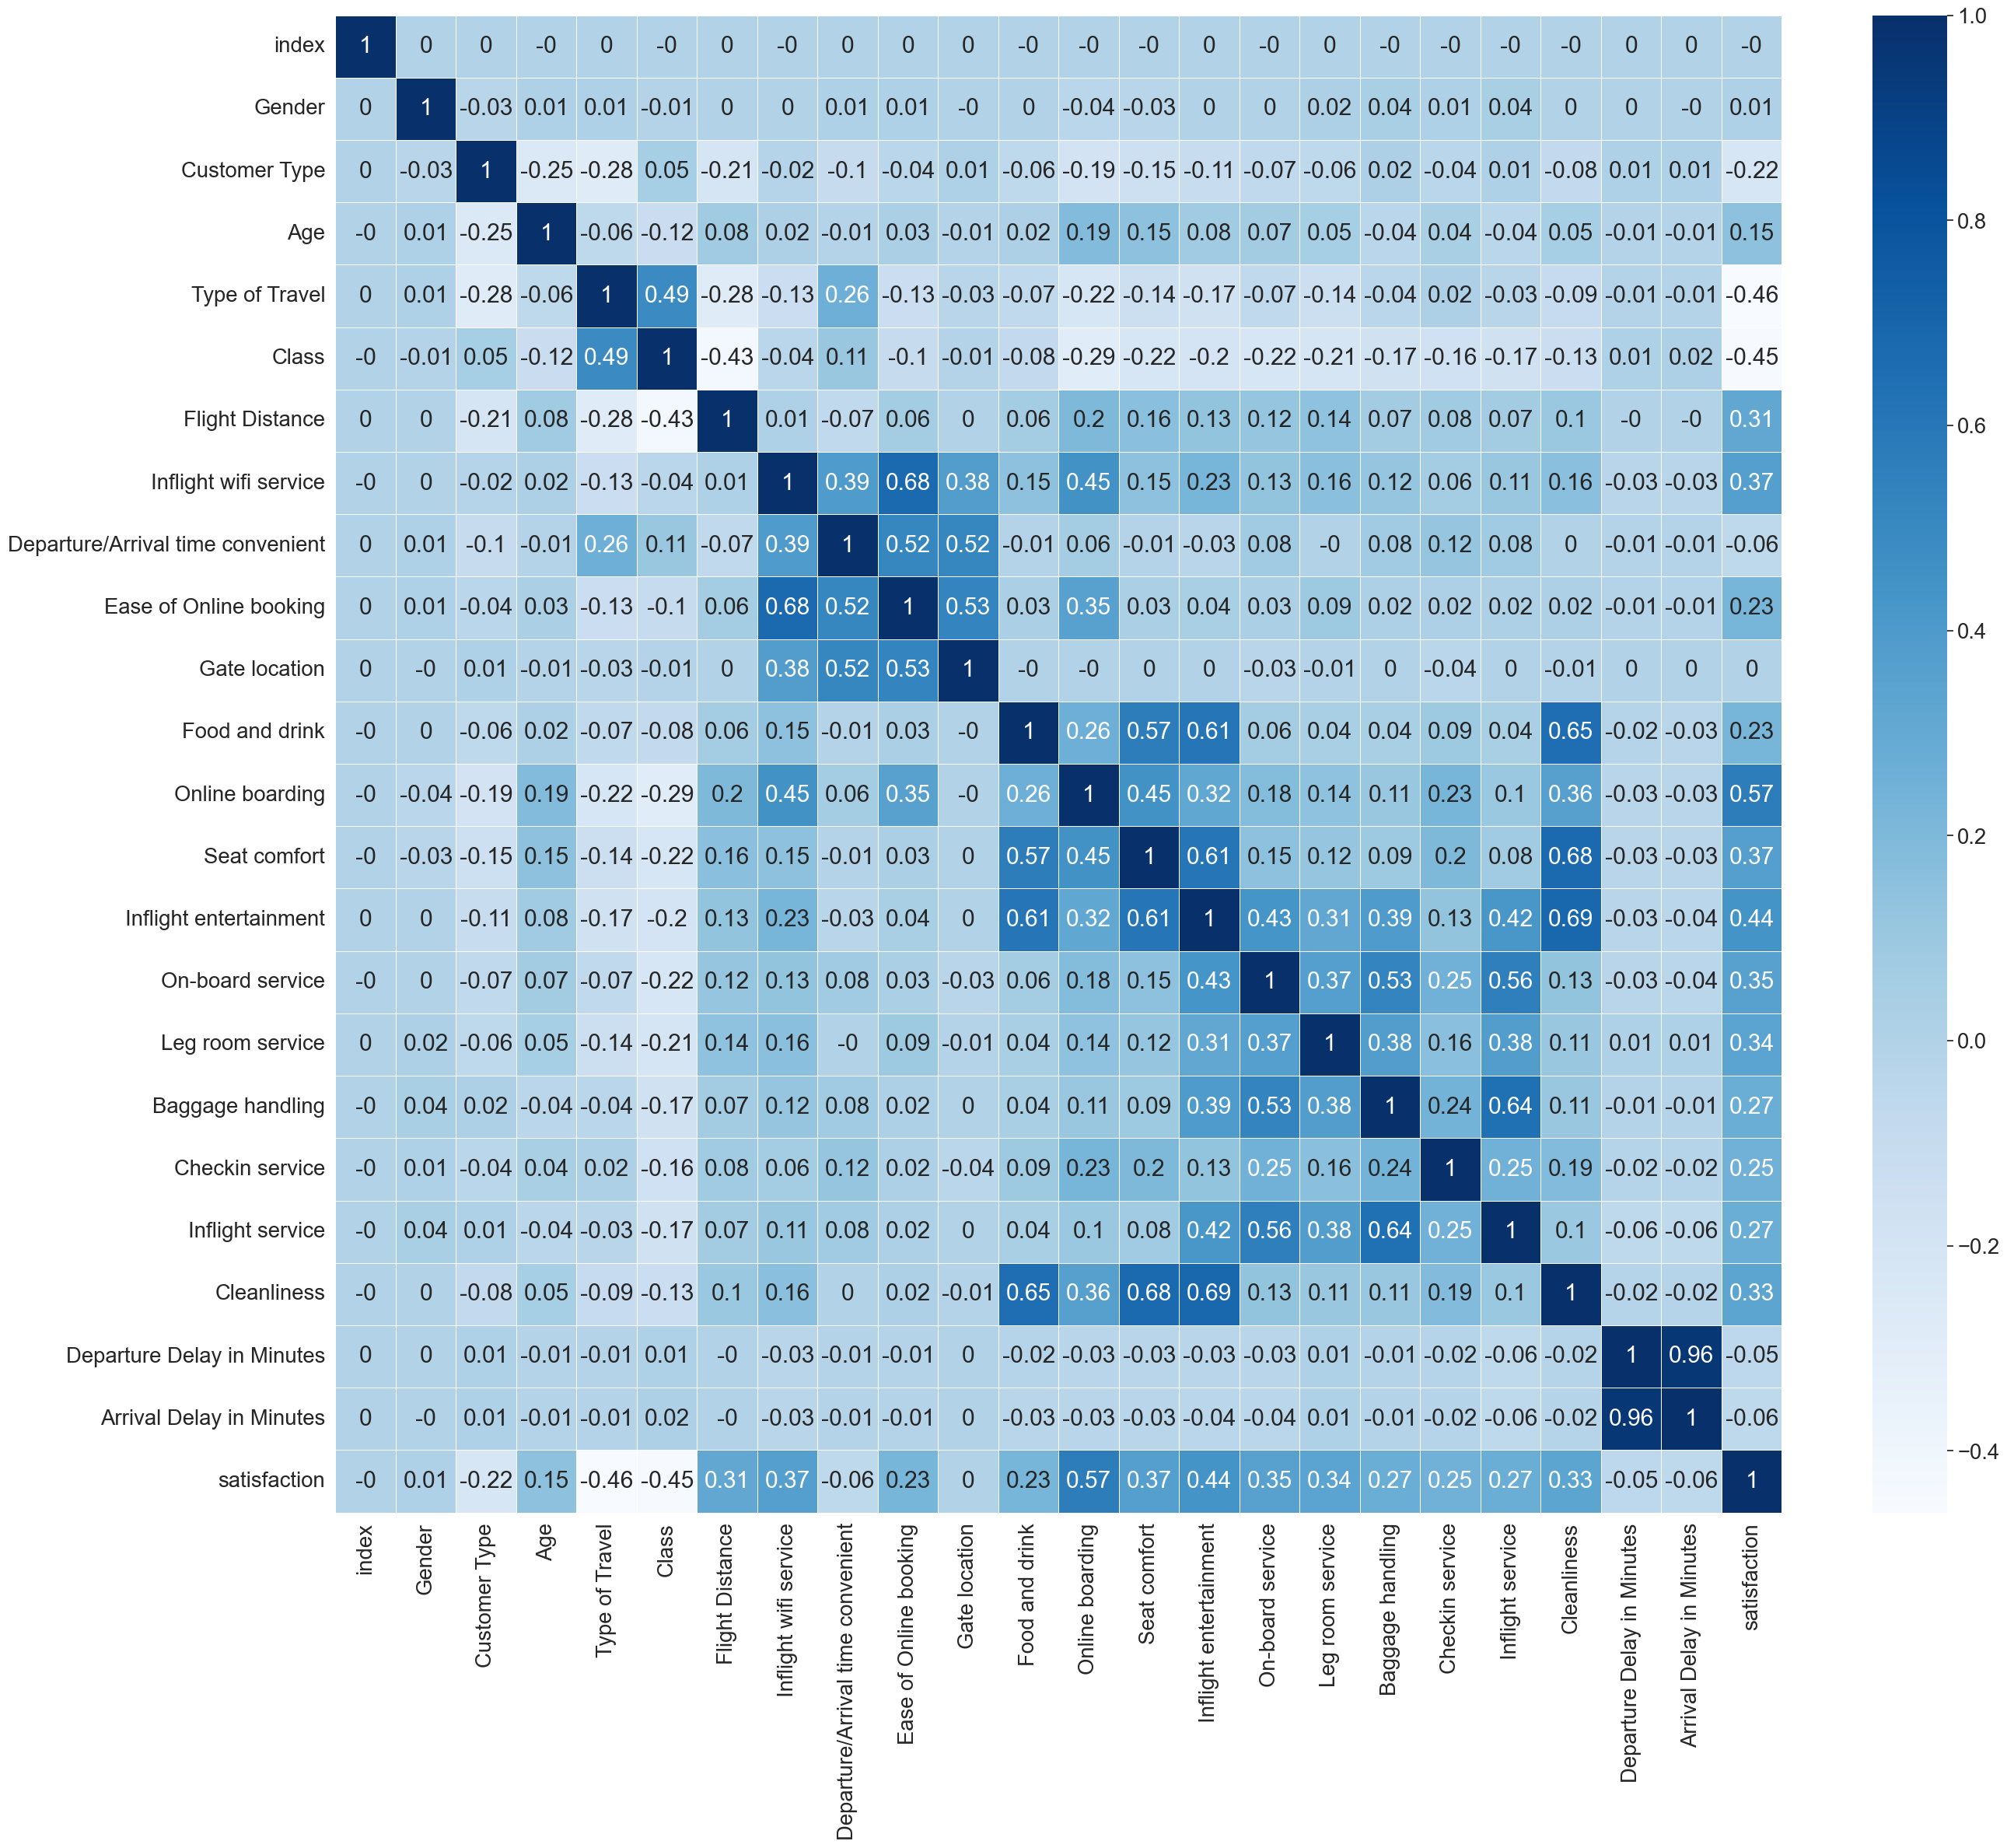

In [33]:
corr_matrix = df1.corr().round(2)
sns.set(font_scale=1.8)
plt.figure(figsize = (30,25))
sns.heatmap(corr_matrix, annot = True, cmap='Blues', linewidths=0.5)

In [34]:
df2 = df.copy()

df2['satisfaction'] = df2['satisfaction'].replace('satisfied', 1)
df2['satisfaction'] = df2['satisfaction'].replace('neutral or dissatisfied', 0)

In [35]:
one_hot_cols = ['Gender', 'Customer Type', 'Type of Travel']
ordinal_cols = ['Class']
standard_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
min_max_cols = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 
               'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
               'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

In [36]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score 

In [38]:
log_reg = LogisticRegression(random_state=0, solver='liblinear')

X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

onehot = ColumnTransformer([('onehot', OneHotEncoder(), one_hot_cols)], remainder='passthrough')
oe = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']])
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

X[ordinal_cols] = oe.fit_transform(X[ordinal_cols])
X[standard_cols] = std_scaler.fit_transform(X[standard_cols])
X[min_max_cols] = min_max_scaler.fit_transform(X[min_max_cols])
X = onehot.fit_transform(X)

cv = cross_val_score(log_reg, X, y, cv=10, scoring='accuracy').mean()

print(f'Logistic Regression Cross Validation Accuracy Score: {cv}')

Logistic Regression Cross Validation Accuracy Score: 0.8628432063578195
